# Equation of Clarinet

Strat from the input impedance
\begin{equation*}
    Z(\omega) / Z_c = j\omega \sum_{n=1}^N \frac{F_n}{\omega_n^2 - \omega^2 + j\omega \omega_n/Q_n}
\end{equation*}
where $Z_c = \rho c /S$ is the characteristic impedance, $F_n = c\frac{\Phi_n^2(0)S(0)}{\int_0^L\Phi_n^2(x)S(x)dx}$ is the modal factor, $Q_n$ is the quality factor, $\omega_n$ is the frequency of the $n$-th mode. $Z_{M,n} = |\mathfrak{Re}[Z(\omega)]|=Z_c F_nQ_n/\omega_n$ is the value of the real maximum of the impedance modulus. For a cylinder, $F_n=2c/l$ for all of the modes.

When radiation losses are ignored, we can use the first mode to approximate the impedance near the resonance frequency $\omega_1$.
\begin{equation*}
    Z(\omega)=  \frac{j\omega F_1 Z_c}{\omega_1^2 - \omega^2 + j\omega \omega_1/Q_1}
\end{equation*}
However, far from the resonances, the truncation strongly modifies the predicted response of the resonator. For the first register of the clarinet, the truncation is not as consequential as for conical instruments, because the second resonance frequency is far from the first one, and the first peak is dominant.

Recall that $Z(\omega) = \frac{P(\omega)}{U(\omega)}$, so that 
\begin{equation*}
    (\omega_1^2 - \omega^2 + j\omega \omega_1/Q_1) P(\omega) = j\omega F_1 Z_c U(\omega)
\end{equation*}
Its inverse Fourier transform gives
\begin{equation*}
    \frac{d^2}{dt^2}p(t) + \frac{\omega_1}{Q_1}\frac{d}{dt}p(t) + \omega_1^2 p(t) = F_1 Z_c \frac{d}{dt}u(t)
\end{equation*}

Use *simplified model for the Non-beating reed* to approximate $u(t)$. Assume that 
- the pressure $p$ does not deviate too much from the zero value;
- $Z(0) = 0$;
- a non-beating reed which is typically obtained for a mouth pressure $\gamma$ that is lower than 0:5.

A third order approximation of the flow rate gives
\begin{equation*}
    u = F(p) \sim F_0 + Ap + Bp^2 + Cp^3
\end{equation*}
where $F_0 = \xi(1-\gamma)\sqrt{\gamma}$ is the flow rate, $A=\xi\frac{3\gamma-1}{2\sqrt{\gamma}}, B=-\xi\frac{3\gamma+1}{8\gamma^{3/2}}, C=-\xi\frac{\gamma+1}{16\gamma^{5/2}}$, $\gamma=p_m/p_M$ is the dimensionless mouth pressure, $\xi=Z_c w H\sqrt{\frac{2}{\rho p_M}}$ is dimensionless reed height at rest. Additionally, $p_m$ is the mouth pressure, $p_M$ is the mouth pressure for which the reed remains closed in the static regime.

Finally, we obtain the following equation
\begin{equation*}
    \frac{d^2}{dt^2}p(t) + F_1\left[ \left(Y_{m,1} - A\right) - 2Bp(t) - 3Cp^2(t) \right]\frac{d}{dt}p(t) + \omega_1^2 p(t) = 0
\end{equation*}
where $Y_{m,1} = \frac{\omega_1}{Z_c Q_1 F_1}$ is the value of the (real) minimum of the admittance.

In order to solve this differential equation, let 
\begin{equation*}
    \begin{cases}
        p(t)=y_0\\
        \frac{d}{dt}p(t)=y_1
    \end{cases}
\end{equation*}
Then this equation can be written as
\begin{equation*}
    \begin{cases}
        \frac{d}{dt}y_0 = y_1\\
        \frac{d}{dt}y_1 = -F_1\left[ \left(Y_{m,1} - A\right) - 2By_0 - 3Cy_0^2 \right]y_1 - \omega_1^2 y_0
    \end{cases}
\end{equation*}
It can be solved by the Runge-Kutta method and obtain a numerical solution.

In [51]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from IPython.display import Audio


In [52]:
config = {
    'speed of sound': 343, # m/s
    'density of air': 1.225, # kg/m^3
    'length of tube': 0.148, # m
    'radius of tube': 0.01, # m
    'quality factor': 0.5, # Q1
    'ratio of mouth pressure': 0.45, # gamma
    'reed height at rest': 0.5, # xi
}


c0 = config['speed of sound']
rho0 = config['density of air']
L = config['length of tube']
r = config['radius of tube']
gamma = config['ratio of mouth pressure']
xi = config['reed height at rest']

Q_1 = config['quality factor']

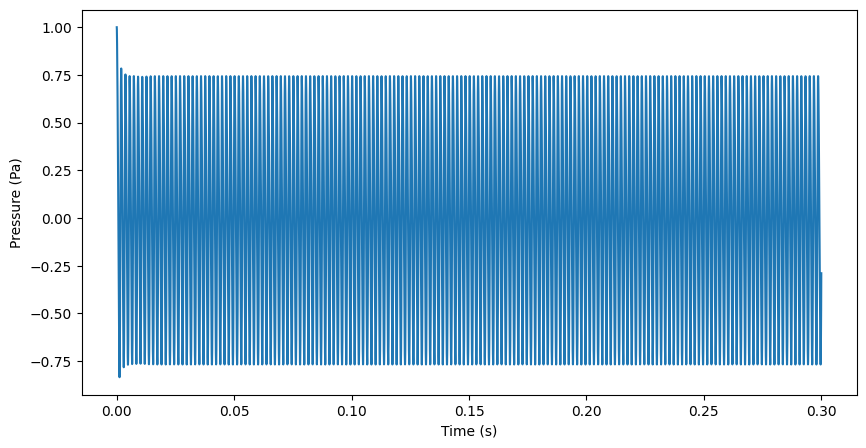

In [53]:
S = np.pi * r**2 # Cross-sectional area of the tube
Z_c = rho0 * c0 / S # Characteristic impedance of the tube
F_1 = 2 * c0 / L

A = xi * (3 * gamma - 1) / (2 * gamma ** (1/2))
B = - xi * (3 * gamma + 1) / (8 * gamma ** (3/2))
C = - xi * (gamma + 1) / (16 * gamma ** (5/2))

def get_omega(n, l):
    return 2 * np.pi * (2 * n - 1) * c0 / (4 * l)

omega_1 = get_omega(1, L)
Y_m1 = omega_1 / (Z_c * Q_1 * F_1)

def differential_system(t, y):
    y0, y1 = y
    dy0_dt = y1
    dy1_dt = -omega_1**2 * y0 - F_1 * ((Y_m1 - A) - 2 * B * y0 - 3 * C * y0**2) * y1
    return [dy0_dt, dy1_dt]

# Initial conditions
y0_initial = 1
y1_initial = 1
initial_conditions = [y0_initial, y1_initial]

Fs = 44100  # Sampling frequency
t_span = [0, 0.3] # time start and end
t_eval = np.linspace(t_span[0], t_span[1], int(Fs * (t_span[1] - t_span[0])))

solution = solve_ivp(differential_system, t_span, initial_conditions, t_eval=t_eval)

t = solution.t
p = solution.y[0]  # y[0] corresponds to p(t)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(t, p)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Pressure (Pa)')
plt.show()



In [54]:
Audio(p, rate=Fs)